My Dataset: Size of the Neighborhoods  
Spider-Man is only human, he can't cover massive areas very well all by himself!
Thus, we need to see which neighborhoods suit his abilities, whether they're too large or too small

First, let's set up all of our necessary imports:  
+ pandas
+ numpy
+ geopandas

In [29]:
import pandas as pd
import numpy as np
import geopandas as geo
import matplotlib.pyplot as plt

Next, we'll read in the necessary data.  
In this case, we're reading in:  
+ the Neighborhood Dataset (for our analysis)
+ Neighborhood shape file (for our Pittsburgh map)

In [3]:
# reading a csv, make sure the seperator is a comma
data = pd.read_csv("Neighborhoods.csv", sep = ",")

# read in the neighborhoods shape file for geopandas
geoData = geo.read_file("Neighborhoods_.shp")

The Neighborhood set contains A LOT of data. 
Since we're talking about neighborhoods and their size, let's read in the name of the neighborhood and their square mileage so we can see how much area Spider-Man needs to cover

In [4]:
# seperate the neighborhood names and square miles from the rest of the data
hood = data[["hood", "sqmiles"]]

Let's see what we're working with. We'll make a bar graph showing the square mileage of all 90 Pittsburgh neighborhoods! (Poor Perry :/)

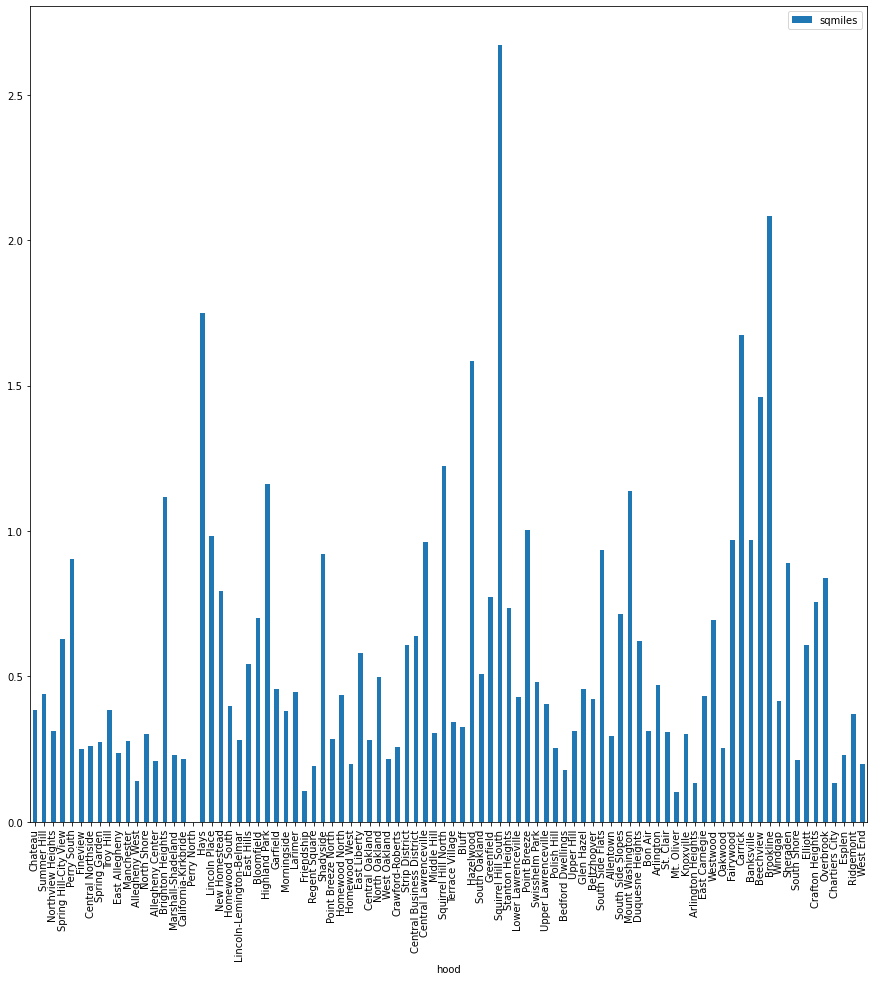

In [5]:
# plot the neighborhood data, with axis labels
hood.plot(kind = "bar", x = "hood", figsize = (15, 15))

That's great, but a bit hard to understand. Let's look at this in a visual format and create a map using Geopandas. In this map, the darker the color, the more area Spider-Man has to cover

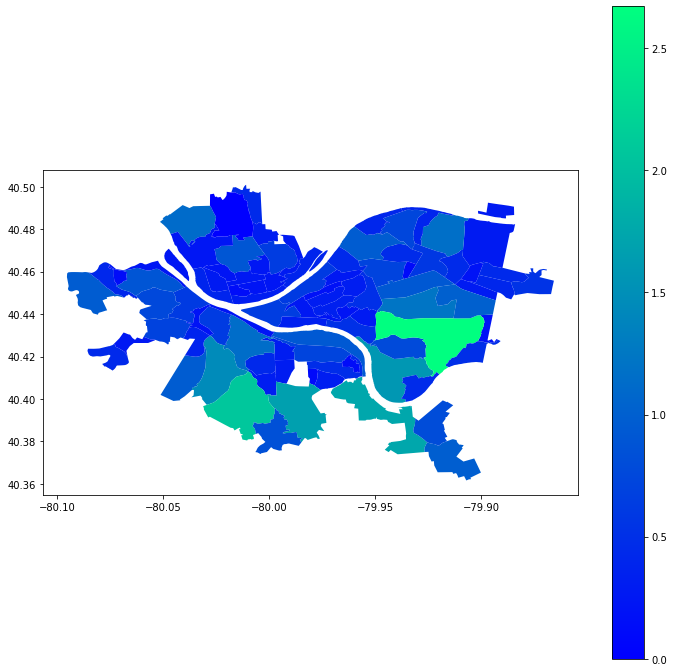

In [6]:
# get the data for square miles to be used as the geopandas column
geoHood = hood["sqmiles"]

# plot the geomap using the square miles as the column (brighter colors = more area)
geoData.plot(column = geoHood, figsize = (12, 12), legend = True, cmap = "winter")

We can see here that we might have an outlier or two that are outshining the rest of the map, so let's see if we can narrow it down some more. This time, we'll clip all data to be within one standard deviation of the mean square mileage. Afterall, Spider-Man can't tend to them all if the neighborhood is too big!

In [7]:
# get the average square mileage
hoodAverage = float(hood["sqmiles"].mean())

# get the standard deviation of the square mileage
hoodStandardDeviation = float(hood["sqmiles"].std())

# get the lower bound by subtracting the mean by 1 standard deviation
oneBelowMean = hoodAverage - hoodStandardDeviation

# get the upper bound by adding one standard deviation to the mean
oneAboveMean = hoodAverage + hoodStandardDeviation

# create a query mask that removes all values above the mean
queryMask1 = (hood["sqmiles"] < oneAboveMean)

# create a second query mask that removes all values below the mean
queryMask2 = (hood["sqmiles"] > oneBelowMean)

# create our final data frame combining the standard deviation query masks
filteredHood = hood[queryMask1 & queryMask2]

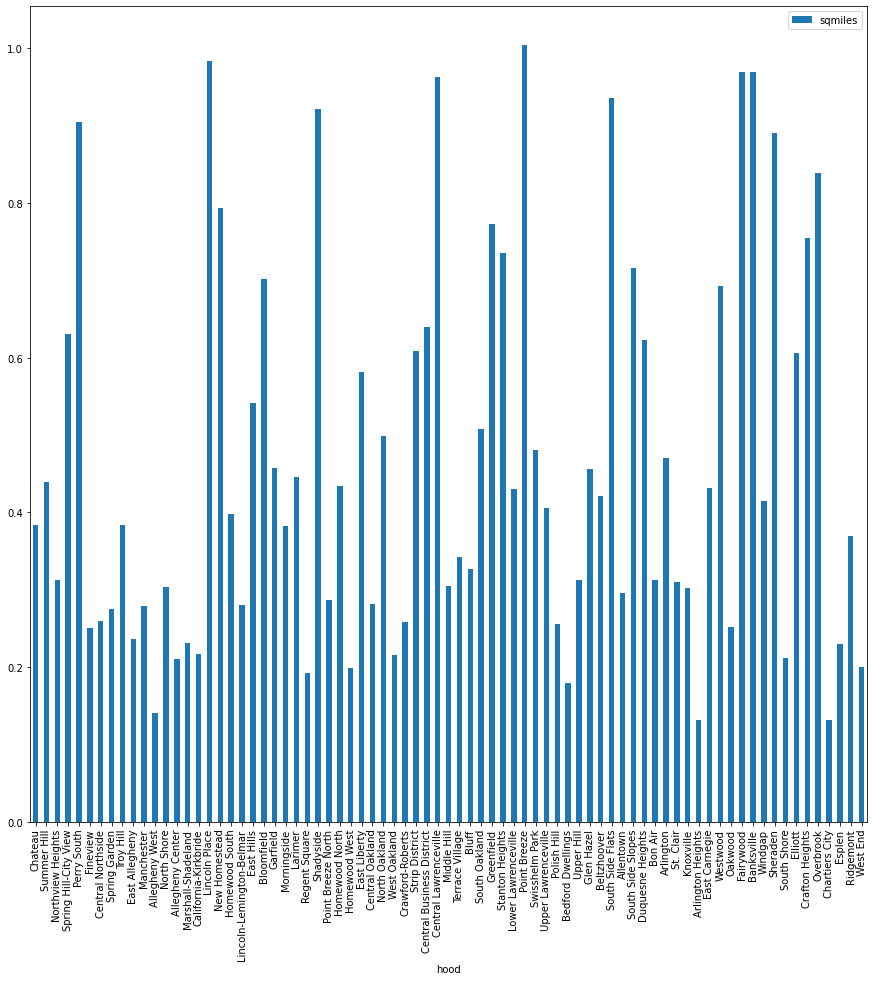

In [8]:
# plot the new data, which has been clipped to be within one standard deviation of the mean
filteredHood.plot(kind = "bar", x = "hood", figsize = (15, 15))

That looks better! Now we've removed our outliers and can look into more detail once again. Before we visualize, we need to clean up the map a bit so that our filtered neighborhoods don't appear on the map.

In [9]:
# make a copy of our geoHood dataframe - references can be a pain!
newGeoHood = geoHood.copy()

# variable to see if we found an index that was clipped or not
found = False

# loop through the indexes of all neighborhoods
for index, entry in enumerate(hood["hood"]):
    
    # if the neighborhood is in the filtered neighborhoods, we set our found flag to true
    for fEntry in filteredHood["hood"]:
        if entry == fEntry:
            found = True
    
    # if the found flag is false, that means we filtered the neighborhood out of the data, so we set the value to 0 so it doesn't appear on the map
    if not found:
        
        # set the value of the neighborhood to 0 if it isn't in our filtered data, so that it doesn't show up on the map
        newGeoHood[index] = -1
    else:
        
        # scales the values by 5 to make the color mapping more visually different
        newGeoHood[index] *= 5
        
    # reset the found flag to false for the next iteration
    found = False

Now that our neighborhoods have been filtered out of the geo data, we can plot the map, and we should only see the neighborhoods that are within one standard deviation of the mean square mileage.

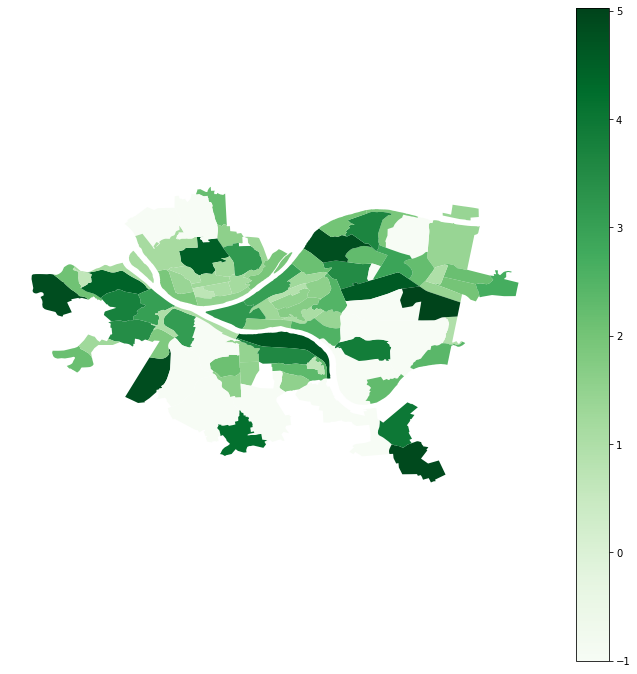

In [10]:
# plot the geo data on a map using the square mileage to determine the hue
geoData.plot(column = newGeoHood, figsize = (12, 12), legend = True, cmap = "Greens").set_axis_off()

Now we can see that our neighborhoods have been filtered out based on their square mileage. In this case, we can see that the dark green neighborhoods represent the largest neighborhoods, the lighter green represent the medium-sized neighborhoods, and the light green or white neighborhoods represent the smaller neighborhoods.   

Now, we need to find our best neighborhood! The best neighborhood for Spider-Man is going to be large enough for him to be able to help the most amount of people, but small enough where he isn't stretched too thin. Thus, let's take a look at the mean and median neighborhoods to see where we stand

In [34]:
newMean = filteredHood["sqmiles"].mean()
newMedian = filteredHood["sqmiles"].median()
print("Filtered mean: " + str(newMean))
print("Filtered median: " + str(newMedian))

Filtered mean: 0.46111688311688304
Filtered median: 0.398


We have our filtered statistics, so let's see which neighborhoods they are and plot them accordingly

Test Markdown

In [54]:
medianHoodIndex = 0
averageHoodIndex = 0
minOffset = abs(newMean - filteredHood["sqmiles"][0])
for index, (hood, size) in enumerate(zip(filteredHood["hood"], filteredHood["sqmiles"])):
    if size == newMedian:
        medianHoodIndex = index
    if abs(newMean - size) < minOffset:
        averageHoodIndex = index
        
print(medianHoodIndex)
print(averageHoodIndex)
print(filteredHood["hood"][medianHoodIndex])
print(filteredHood["hood"][averageHoodIndex])

18
67


KeyError: 18

In [ ]:
statGeoHood = geoHood.copy()
